In [0]:
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from textblob import TextBlob
from IPython.display import display
import pandas as pd
import numpy as np



In [0]:
ACCESS_TOKEN = '1151319193012170753-I73TTFGJfiAQ1DRGqwcZmgxPmUSqzg'
ACCESS_SECRET = '00ziZ3ywjBuXsxVX0pckZOphRdbOB6CrnxKBxf6Y8CrUx'
CONSUMER_KEY = 'qr68UaIF2ZlmCGjaHYaYemaLc'
CONSUMER_SECRET = '9ULgOkTLCCHlgRSW7wIE76lqQXyy485vnvkjOU31VPbnx69M9M'
 
#setup access to API
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api = tweepy.API(auth,wait_on_rate_limit=True   

tweets = [tweet for tweet in tweepy.Cursor(api.search, q=['#matilampulagi','#matilampu']).items(2000)]
print("Number of tweets extracted: {}.\n".format(len(tweets)))

In [0]:
import re

def clean_tweet(tweet):
    # process the tweets

    #Convert to lower case 
    tweet = tweet.lower()
    #Convert www.* or https?://* to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','AT_USER',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #trim
    tweet = tweet.strip('\'"')
    
    return tweet

def analize_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    an = analysis.translate(from_lang='id', to='en')
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [0]:
# Panda dataframe
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

In [0]:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

In [0]:
display(data.head(200))

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

,Tweets,SA
0,Wah emang netizen +62! Black out enggak mengha...,-1
1,RT @yejisu00: Indonesian constantly consume a ...,1
2,RT @yejisu00: Indonesian constantly consume a ...,1
3,RT @pendakiloyo: @AttaHalilintar back to ancie...,0
4,Gaeeees mati lampu gaeeees.\n#matilampulagi #m...,0
5,RT @esa_trisaputra: Netijen mulut nya tajem2 b...,0
6,RT @esa_trisaputra: Netijen mulut nya tajem2 b...,0
7,RT @yejisu00: Indonesian constantly consume a ...,1
8,RT @yejisu00: Indonesian constantly consume a ...,1
9,RT @MarvixMz: Penyebab mati listrik gengs\n#ma...,0


In [0]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))


Percentage of positive tweets: 66.80327868852459%
Percentage of neutral tweets: 32.58196721311475%
Percentage of negative tweets: 0.6147540983606558%


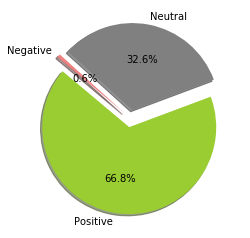

In [0]:
import matplotlib.pyplot as plt

def showPieChart(positive,neutral,negative):
    labels = 'Positive', 'Neutral', 'Negative'
    color = ['yellowgreen','gray','lightcoral']
    value = [positive, neutral, negative]
    explode = (0.1, 0.1, 0.1)
    plt.pie(value,autopct='%1.1f%%',colors=color, labels=labels , shadow= True,explode = explode , startangle=140)
    plt.show()
    
showPieChart(positive=len(pos_tweets),neutral=len(neu_tweets),negative=len(neg_tweets))